### Checklist for submission

It is extremely important to make sure that:

1. Everything runs as expected (no bugs when running cells);
2. The output from each cell corresponds to its code (don't change any cell's contents without rerunning it afterwards);
3. All outputs are present (don't delete any of the outputs);
4. Fill in all the places that say `# YOUR CODE HERE`, or "**Your answer:** (fill in here)".
5. Never copy/paste any notebook cells. Inserting new cells is allowed, but it should not be necessary.
6. The notebook contains some hidden metadata which is important during our grading process. **Make sure not to corrupt any of this metadata!** The metadata may for example be corrupted if you copy/paste any notebook cells, or if you perform an unsuccessful git merge / git pull. It may also be pruned completely if using Google Colab, so watch out for this. Searching for "nbgrader" when opening the notebook in a text editor should take you to the important metadata entries.
7. Although we will try our very best to avoid this, it may happen that bugs are found after an assignment is released, and that we will push an updated version of the assignment to GitHub. If this happens, it is important that you update to the new version, while making sure the notebook metadata is properly updated as well. The safest way to make sure nothing gets messed up is to start from scratch on a clean updated version of the notebook, copy/pasting your code from the cells of the previous version into the cells of the new version.
8. If you need to have multiple parallel versions of this notebook, make sure not to move them to another directory.
9. Although not forced to work exclusively in the course `conda` environment, you need to make sure that the notebook will run in that environment, i.e. that you have not added any additional dependencies.

**FOR HA1, HA2, HA3 ONLY:** Failing to meet any of these requirements might lead to either a subtraction of POEs (at best) or a request for resubmission (at worst).

We advise you to perform the following steps before submission to ensure that requirements 1, 2, and 3 are always met: **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). This might require a bit of time, so plan ahead for this (and possibly use Google Cloud's GPU in HA1 and HA2 for this step). Finally press the "Save and Checkout" button before handing in, to make sure that all your changes are saved to this .ipynb file.

### Fill in name of notebook file
This might seem silly, but the version check below needs to know the filename of the current notebook, which is not trivial to find out programmatically.

You might want to have several parallel versions of the notebook, and it is fine to rename the notebook as long as it stays in the same directory. **However**, if you do rename it, you also need to update its own filename below:

In [1]:
nb_fname = "IHA2.ipynb"

### Fill in group number and member names (use NAME2 and GROUP only for HA1, HA2 and HA3):

In [2]:
NAME1 = "Nicole Tran Luu" 
NAME2 = ""
GROUP = ""

### Check Python version

In [3]:
from platform import python_version_tuple
assert python_version_tuple()[:2] == ('3','7'), "You are not running Python 3.7. Make sure to run Python through the course Conda environment."

### Check that notebook server has access to all required resources, and that notebook has not moved

In [4]:
import os
nb_dirname = os.path.abspath('')
assignment_name = os.path.basename(nb_dirname)
assert assignment_name in ['IHA1', 'IHA2', 'HA1', 'HA2', 'HA3'], \
    '[ERROR] The notebook appears to have been moved from its original directory'

### Verify correct nb_fname

In [5]:
from IPython.display import display, HTML
try:
    display(HTML(r'<script>if("{nb_fname}" != IPython.notebook.notebook_name) {{ alert("You have filled in nb_fname = \"{nb_fname}\", but this does not seem to match the notebook filename \"" + IPython.notebook.notebook_name + "\"."); }}</script>'.format(nb_fname=nb_fname)))
except NameError:
    assert False, 'Make sure to fill in the nb_fname variable above!'

### Verify that your notebook is up-to-date and not corrupted in any way

In [6]:
import sys
sys.path.append('..')
from ha_utils import check_notebook_uptodate_and_not_corrupted
check_notebook_uptodate_and_not_corrupted(nb_dirname, nb_fname)

Matching current notebook against the following URL:
http://raw.githubusercontent.com/JulianoLagana/deep-machine-learning/master/home-assignments/IHA2/IHA2.ipynb
[SUCCESS] No major notebook mismatch found when comparing to latest GitHub version. (There might be minor updates, but even that is the case, submitting your work based on this notebook version would be acceptable.)


# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall) (download the dataset directly from Kaggle using this link). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn
from torch import optim
from torch.utils.data import random_split
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix


%matplotlib inline

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [9]:
dataset = pd.read_csv('300k.csv')

/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [10]:
subset1 = dataset[["latitude", "longitude", "class"]]

Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [11]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [12]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [13]:
# The id of the interest pokemon
diglett = name_dict["Diglett"]
seel = name_dict["Seel"]
tauros = name_dict["Tauros"]

# Boolean to check if it is either of these three pokemons
extract1 = (subset1['class']==diglett)
extract2 = (subset1['class']==seel)
extract3 = (subset1['class']==tauros)

subset = pd.concat([dataset[extract1],dataset[extract2],dataset[extract3]])


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

Is the dataset balanced?

Text(0, 0.5, 'Frequency')

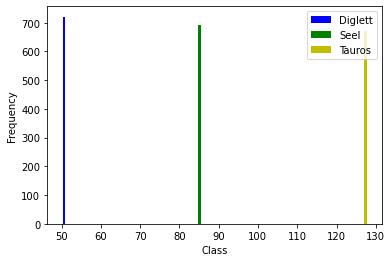

In [14]:
# Plot the histogram for each pokemon
plt.hist([ subset['class'][extract1],subset['class'][extract2], subset['class'][extract3] ]  , bins=30, color = ['b','g','y'], label = ['Diglett', 'Seel','Tauros'])
plt.legend()

plt.xlabel("Class")
plt.ylabel("Frequency")

In [15]:
n = {}
n["Diglett"] = len(subset[extract1])
n["Seel"] = len(subset[extract2])
n["Tauros"] = len(subset[extract3])

print('Frequency:',n)

Frequency: {'Diglett': 721, 'Seel': 692, 'Tauros': 670}


/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


**Your answer:** Since the results shows that the frequency are fairly similar, it is almost balanced.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/nicoletl/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'longitude')

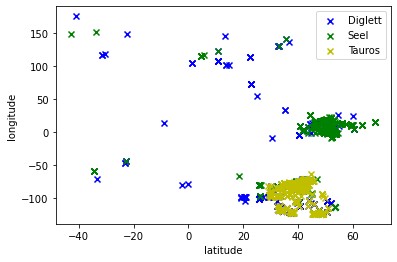

In [16]:
fig, ax = plt.subplots()

# For Diglett
temp_set = subset[extract1]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "b", marker = "x", label = "Diglett")
# For Seel
temp_set = subset[extract2]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "g", marker = "x", label = "Seel")
# For Tauros
temp_set = subset[extract3]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "y", marker = "x", label = "Tauros")
ax.legend()
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** These pairplots above could be good to see the distibution for each feature and the scatter plot of each to easily seperate these three pokemons by the features.

In [ ]:
sns.pairplot(subset, hue='class');

KeyboardInterrupt: 

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:** I assume it is hard to separate the Diglett class, because it is very spread and it occure in positions where the Seel and Tauros are, in another word it has high variance. While for Tauros, it mostely occurs whitin latitude 20-60 and longitude -50-(-100) and similar for Seel, the variance is pretty low. Hence, it the model for the Tauros and Seel would have high accuracy and less for the Diglett.

Which accuracy do you expect to achieve?

**Your answer:** As mentioned above, it would be pretty well for the Tauros and Seel class, but bit worse for the Diglett.

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [20]:
# Function to map the classes to numbers
def encode_pokemons(pokemons):
    if name_dict[pokemons] == 'Diglett':
        return 0
    if name_dict[pokemons] == 'Seel':
        return 1
    if name_dict[pokemons] == 'Tauros':
        return 2
    else:
        raise ValueError('Species \'{}\' is not recognized.'.format(species))

In [23]:
# Implementing the input but only taking the values of the subset
X = subset[['latitude','longitude']].values


temp = map(encode_pokemons, subset['class'].values)
Y = np.array(list(temp))


Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [24]:
# Step 1. Split the training data from validate and test set - 55% for the training set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.45, random_state=10)

# Step2. Split the validation and test set - 25% of 45% is for the validation set and test set has 20% of the validation set
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = (0.2/(0.45)), random_state=10)

# Change our data from Numpy arrays to Torch tensors
torch_x = torch.tensor(x_train, dtype=torch.float32)
torch_y = torch.tensor(y_train, dtype=torch.int64)

torch_x_val = torch.tensor(x_valid, dtype=torch.float32)
torch_y_val = torch.tensor(y_valid, dtype=torch.int64)

 

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [25]:
# Parameters to change
epochs    = 20
batchsize = 100 # training set length: 1145
batchsize_val = 150 # validation set length: 521
lr        = 0.01


In [26]:
# Define dataset ----------------------------------------------------------------------------------------------
torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_t_dataset = TensorDataset(torch_x.to(device), torch_y.to(device))
train_t_data_loader = DataLoader(train_t_dataset, batchsize, shuffle=True)

val_t_dataset = TensorDataset(torch_x_val.to(device), torch_y_val.to(device))
val_t_data_loader = DataLoader(val_t_dataset, batchsize_val, shuffle=True)




In [27]:

# Our model inherits from `nn.Module`, combination of CL1 and CL2. 
# FC1 (LIN1) -> ReLu3 -> FC2 (LIN2)
class LogisticRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(2, 3)
        self.lin2 = nn.Linear(3,3)

    def forward(self, x):
        x = F.relu(self.lin1(x))
        return self.lin2(x)

# Define the model
model = LogisticRegressor()

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr)


Train the network.

In [28]:
# Run the network ----------------------------------------------------------------------------------
for epoch in range(epochs):
    
    # Compute predictions and back-prop in the training set
    losses = []
    n_correct = 0
    for b_x, b_y in train_t_data_loader:
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        hard_preds = pred.argmax(dim=1)
        n_correct += (pred.argmax(dim=1) == b_y).sum().item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    train_accuracy = n_correct/len(train_t_dataset)
    train_avg_loss = sum(losses)/len(losses)    

        
    # Compute predictions in the validation set (with adagrad deactivated)
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_t_data_loader:
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += (pred.argmax(dim=1) == b_y).sum().item()
        val_accuracy = n_correct/len(val_t_dataset)
        val_avg_loss = sum(losses)/len(losses)      
        
    # Display the loss and accuracy    
    display_str = 'Epoch {}'
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f}'
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0	Loss: 3.538 	Loss (val): 1.205	Accuracy: 0.37	Accuracy (val): 0.48
Epoch 1	Loss: 1.152 	Loss (val): 1.039	Accuracy: 0.53	Accuracy (val): 0.56
Epoch 2	Loss: 1.033 	Loss (val): 0.923	Accuracy: 0.48	Accuracy (val): 0.56
Epoch 3	Loss: 0.985 	Loss (val): 0.901	Accuracy: 0.52	Accuracy (val): 0.56
Epoch 4	Loss: 0.936 	Loss (val): 0.917	Accuracy: 0.53	Accuracy (val): 0.56
Epoch 5	Loss: 0.920 	Loss (val): 0.885	Accuracy: 0.53	Accuracy (val): 0.56
Epoch 6	Loss: 0.904 	Loss (val): 0.872	Accuracy: 0.53	Accuracy (val): 0.55
Epoch 7	Loss: 0.896 	Loss (val): 0.871	Accuracy: 0.53	Accuracy (val): 0.56
Epoch 8	Loss: 0.893 	Loss (val): 0.877	Accuracy: 0.55	Accuracy (val): 0.62
Epoch 9	Loss: 0.891 	Loss (val): 0.851	Accuracy: 0.57	Accuracy (val): 0.61
Epoch 10	Loss: 0.890 	Loss (val): 0.868	Accuracy: 0.59	Accuracy (val): 0.60
Epoch 11	Loss: 0.892 	Loss (val): 0.857	Accuracy: 0.59	Accuracy (val): 0.63
Epoch 12	Loss: 0.882 	Loss (val): 0.863	Accuracy: 0.56	Accuracy (val): 0.59
Epoch 13	Loss: 0.881 	

For you to pass this assignment, you must obtain an accuracy on the validation set greater than 50%. It may be necessary to search for a good architecture by trying several different ones. If you want a challenge, try getting an accuracy greater than 63%.

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [29]:
# Use the test sample in the model and test the accuracy
# Test samples to torch tensors
test_samples = torch.tensor(x_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.int64)

# Prediction, run the model with the test samples
preds = model(test_samples).argmax(dim=1)

# Calculate the accuracy
acc = (preds == test_labels).sum().item()/len(preds)
print("Accuracy: %.2f" % acc)

Accuracy: 0.67


Compute the confusion matrix of your predictions on the test set.

In [30]:
confusion_matrix(test_labels, preds)

array([[82, 23, 29],
       [14, 99, 34],
       [37,  0, 99]])

What can you conclude from the computed accuracy and confusion matrix?

**Your answer:** With ~64% accuracy for the test data, it could detect Tauros and Seel pretty well, while it was less good for Diglett. This could refer back to the scatter plot above where the Digletts were spread. Therefore, it will be harder to detect and separate them from the other two pokemons. This is also shown in the confusion matrix where it was most difficult to detect the Diglett (see first row). For Seel, it was better results but still a few bad and for Tauros, almost all could be detected. 

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Applications/anaconda3/envs/dml/lib/python3.7/site-packages/ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0, 0.5, 'longitude')

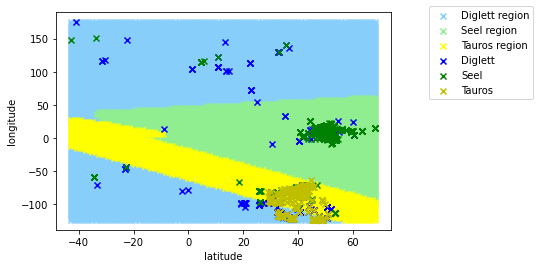

In [31]:
max_lat = (max(subset['latitude']))
max_long = (max(subset['longitude']))

min_lat = (min(subset['latitude']))
min_long = (min(subset['longitude']))

points = 100
lat_range = np.linspace(min_lat,max_lat,points)
long_range = np.linspace(min_long,max_long,points)
lat_range_res = []
long_range_res = np.repeat(long_range,points)

for i in range(points):
    lat_range_res = np.concatenate((lat_range_res, lat_range), axis=None)

    
X_test = {'latitude': lat_range_res, 'longitude': long_range_res}
Xtestset = pd.DataFrame(data=X_test)

torch_x_test = torch.tensor(Xtestset.values, dtype=torch.float32)

pred = model(torch_x_test).argmax(dim=1)
pred_num = pred.data.numpy() # Torch to numpy

eD = (pred_num==0) # Diglett
eS = (pred_num==1) # Seel
eT = (pred_num==2) # Tauros

fig, ax = plt.subplots()

# For Diglett
temp_set = Xtestset[eD]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "lightskyblue", marker = "x", label = "Diglett region")
# For Seel
temp_set = Xtestset[eS]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "lightgreen", marker = "x", label = "Seel region")
# For Tauros
temp_set = Xtestset[eT]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = 'yellow', marker = "x", label = "Tauros region")

# For Diglett
temp_set = subset[extract1]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "b", marker = "x", label = "Diglett")
# For Seel
temp_set = subset[extract2]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "g", marker = "x", label = "Seel")
# For Tauros
temp_set = subset[extract3]
ax.scatter(temp_set['latitude'],temp_set['longitude'], color = "y", marker = "x", label = "Tauros")
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")



Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:** Yes, in most of my test I got a accuracy around 65% and it will give a scatter plot like below. Which was more or less what I excepted, because the Tauros should appear in the right lower corner and then the Seel can be found right above which is where it mostly appears. Finally the Digletts can be found everywhere else in this scatter plot. The plot also shows that the decision regions almost cover all the points for each class pretty well.



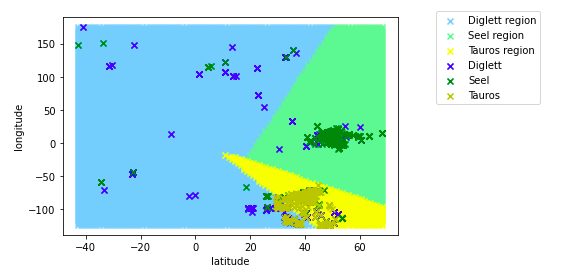

## 6. Exploration

You have now trained and evaluated a neural network for this particular classification task. Can you provide a brief explanation as to how you could use it to decide where to travel, if you're interested in capturing the aforementioned Pokemons?

**Your answer:** To capture the aforementioned Pokemons, you simply follow the plot above and go the certain region (position with given latitude and longitude) to have the highest chance to catch the pokemon. However, the chance to find one pokemon could differ from time to time, depending on weather, time of the day and more.

Is (are) there any other feature(s) from the original dataset (e.g. hour of the day, pressure, wind speed, population density, etc.) which you think would be valuable to add as an input feature to your classifier to improve its performance? 

**Your answer:** I think the pressure, temperature, appeared time of the day and of the week would higher the posibilites. Hence, we can have more clue exactly when has the highest probability to find and catch the pokemons

In [32]:
tempset = dataset[['pressure', 'appearedTimeOfDay', 'temperature','appearedDayOfWeek','class']]
diglettSet = pd.concat([tempset[extract1]])
seelSet = pd.concat([tempset[extract2]])
taurosSet = pd.concat([tempset[extract3]])



To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

Text(0.5, 0.98, 'appearedDayOfWeek')

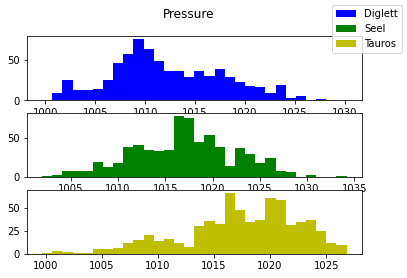

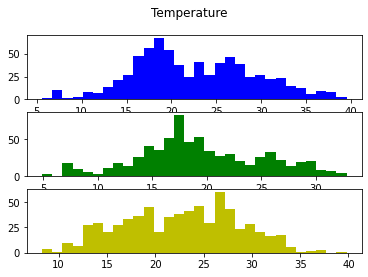

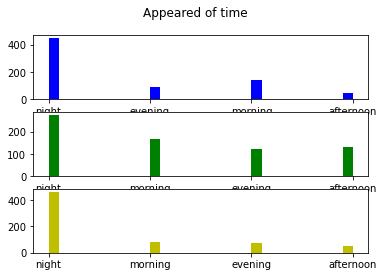

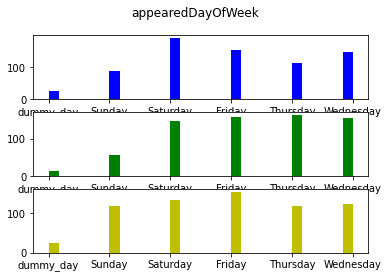

In [33]:
# Plot the pressure
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(diglettSet['pressure'], bins=30, color = 'b', label = 'Diglett')
ax2.hist(seelSet['pressure'], bins=30, color = 'g', label = 'Seel')
ax3.hist(taurosSet['pressure'], bins=30, color = 'y', label = 'Tauros')
fig.suptitle('Pressure')
fig.legend()


# Plot the temperature
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(diglettSet['temperature'], bins=30, color = 'b')
ax2.hist(seelSet['temperature'], bins=30, color = 'g')
ax3.hist(taurosSet['temperature'], bins=30,  color = 'y')
fig.suptitle('Temperature')


# Plot the appearedHour
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(diglettSet['appearedTimeOfDay'], bins=30, color = 'b')
ax2.hist(seelSet['appearedTimeOfDay'], bins=30, color = 'g')
ax3.hist(taurosSet['appearedTimeOfDay'], bins=30, color = 'y')
fig.suptitle('Appeared of time')

# Plot the appearedDayOfWeek
fig, (ax1,ax2,ax3) = plt.subplots(3)
ax1.hist(diglettSet['appearedDayOfWeek'], bins=30, color = 'b')
ax2.hist(seelSet['appearedDayOfWeek'], bins=30, color = 'g')
ax3.hist(taurosSet['appearedDayOfWeek'], bins=30, color = 'y')
fig.suptitle('appearedDayOfWeek')


What does(do) this(ese) histogram(s) show you? Could it be beneficial to add this(ese) new feature(s) as input? Explain why/why not.

**Your answer:** It could be benifit to have these features. 

From the first histogram, pressure, would be benifit if we once decide to catch a specific pokemon today. Hence, we can see that these three pokemons appears in different pressures, so if we want to just catch Diglett today, then we probably should go to enviroments with pressure around 1005. However, they all appear in pressure between 1005-1020, so that would give us good information where to find them.

Same thing is for the temperature. Additionally, this feature would be better that pressure because it is easier to know the temperature at specific place/specific time or day. So even though the pressure could tells us much, it could be useless if we can't measure the pressure and we can't really regulate the pressure.

The third histogram is interesting, hence it tells us about what time during the day we should go out to catch the pokemons. As we can see, they use to be out during the night, which would not be the time we go out and catch if we did not know that.

The last histogram tells in Saturday we have the highest probability to catch these three pokemons. However, in Wednesday to Friday they do appear pretty often too.

The purpose was this assignment was mostly to make you design a network for classification, using this Pokemon dataset as use case. However, if you want to find those three particular Pokemons, most likely using a network for classification is not the best approach. An alternative would be to perform localization by using regression instead. **Can you state some pros and cons of approach this as a regression problem instead of a classification problem?** (We do not except very detailed answers, you will pass the assignment as long as you make a reasonable attempt at explaining the pros and cons.)

**Your answer:** Regression problem would be more suitable for this case, hence we want to for example now what position we could find the pokemons. While in classification, we simply get classes (here, regions) where the pokemons are in the scatter plot. In regression we will get continous numbers and we are more focusing to find a "trend" for the data. The regression model could e.g. given a latitude tells me what longitude we should have to find a pokemon, which would give us more exactly where to find the pokemon. However, it might be less usefull when we want to find one specific pokemon class. Then the classification would give us a better model.

## 7. (optional)

Assuming you found useful new features in the last part of this assignment, train a new classifier that uses these featues as well. Did the accuracy on the validation set improve? What's the highest accuracy you can achieve?

In [ ]:
# YOUR CODE HERE